# Title

Short description of what this notebook is about

## Preliminaries

In [196]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Import commonly used libraries and magic command for inline plotting

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [198]:
%matplotlib inline

## Work

This is where work gets done.

**Read data to pandas dataframes


In [199]:
tax_df = pd.read_csv("./data/raw/Taxinfo.csv")

In [200]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             1004 non-null   int64 
 1   HHDL            1004 non-null   int64 
 2   Married         1004 non-null   int64 
 3   CollegGrads     1004 non-null   int64 
 4   AHHAge          1004 non-null   int64 
 5   Cars            1004 non-null   int64 
 6   Filed_2017      1004 non-null   int64 
 7   Filed_2016      1004 non-null   int64 
 8   Filed_2015      1004 non-null   int64 
 9   PoliticalParty  1004 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.6+ KB


In [201]:
tax_df.iloc[:5,:10]

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015,PoliticalParty
0,49685,227187,0,0,105,0,1,1,1,Democrat
1,64756,-507342,2,3,68,3,1,0,0,Independent
2,115435,521290,1,3,81,2,0,1,0,Republican
3,99454,251829,2,1,52,4,1,0,0,Republican
4,157274,-472337,0,1,28,1,1,0,1,Independent


In [202]:
tax_df.iloc[:5,3:10]

,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015,PoliticalParty
0,0,105,0,1,1,1,Democrat
1,3,68,3,1,0,0,Independent
2,3,81,2,0,1,0,Republican
3,1,52,4,1,0,0,Republican
4,1,28,1,1,0,1,Independent


In [203]:
tax_df.iloc[:,9]

0          Democrat
1       Independent
2        Republican
3        Republican
4       Independent
           ...     
999        Democrat
1000     Republican
1001     Republican
1002     Republican
1003     Republican
Name: PoliticalParty, Length: 1004, dtype: object

In [204]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


**Importing sweetviz


In [205]:
import sweetviz as sv

**Analyzing dataset


In [210]:
tax_report = sv.analyze(tax_df)

D**isplay the report


In [211]:
tax_report.show_html("output/sweetviz_report.html")

Report output/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Basic Report 

In [254]:
tax_df.groupby(['PoliticalParty']).size()

PoliticalParty
Democrat       336
Independent    337
Republican     331
dtype: int64

Basic Report by percentage

In [213]:
tax_df['PoliticalParty'].value_counts(normalize=True)

Independent    0.335657
Democrat       0.334661
Republican     0.329681
Name: PoliticalParty, dtype: float64

Exploring the data type

In [214]:
tax_df.select_dtypes(include=np.number).columns.tolist()

['HHI',
 'HHDL',
 'Married',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015']

Married, Filed_2017, Filed_2016, and Filed_2015 are categorial. Let's convert their data type

In [215]:
tax_df["Married"] = tax_df["Married"].astype("object")
tax_df["Filed_2016"] = tax_df["Filed_2016"].astype("object")
tax_df["Filed_2015"] = tax_df["Filed_2015"].astype("object")
tax_df["Filed_2017"] = tax_df["Filed_2017"].astype("object")
tax_df["CollegGrads"] = tax_df["CollegGrads"].astype("object")
tax_df["Cars"] = tax_df["Cars"].astype("object")


In [216]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             1004 non-null   int64 
 1   HHDL            1004 non-null   int64 
 2   Married         1004 non-null   object
 3   CollegGrads     1004 non-null   object
 4   AHHAge          1004 non-null   int64 
 5   Cars            1004 non-null   object
 6   Filed_2017      1004 non-null   object
 7   Filed_2016      1004 non-null   object
 8   Filed_2015      1004 non-null   object
 9   PoliticalParty  1004 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.6+ KB


Create Cross tab for PoliticalParty by Marital status

In [217]:
status_by_MaritalStatus = pd.crosstab(tax_df['Married'], tax_df['PoliticalParty'])
status_by_MaritalStatus


PoliticalParty,Democrat,Independent,Republican
Married,,,
0,121,119,102
1,111,111,128
2,104,107,101


Create plot for PoliticalParty by Marital status

<AxesSubplot:xlabel='Married'>

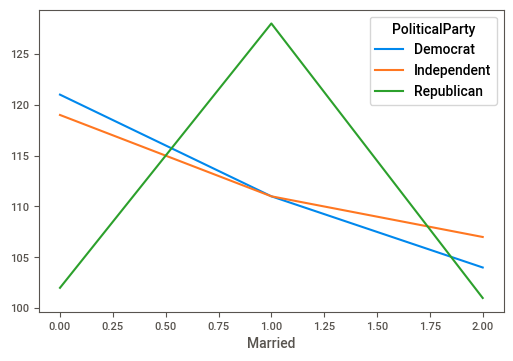

In [218]:
status_by_MaritalStatus.plot(kind ='line')

Create plot for PoliticalParty by College graduate

In [219]:
status_by_CollegeGrad = pd.crosstab(tax_df['CollegGrads'], tax_df['PoliticalParty'])
status_by_CollegeGrad

PoliticalParty,Democrat,Independent,Republican
CollegGrads,,,
0,55,46,45
1,49,62,52
2,49,57,68
3,60,54,49
4,58,62,64
5,65,56,53


Create Plot by College Grads

<AxesSubplot:xlabel='CollegGrads'>

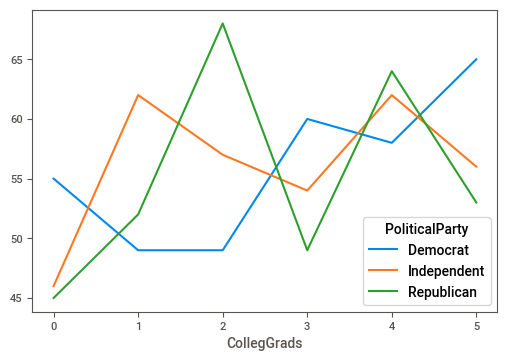

In [220]:
status_by_CollegeGrad.plot(kind ='line')

In [221]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [222]:
X = tax_df.iloc[:, 0:9]
y = tax_df.iloc[:, 9]

Create categorial and numerical columns

In [223]:
categorical_cols= X.select_dtypes(include=['object']).columns.tolist()
numeric_cols= X.select_dtypes(include=['number']).columns.tolist()
all_cols = X.columns.tolist()


In [224]:
categorical_cols

['Married', 'CollegGrads', 'Cars', 'Filed_2017', 'Filed_2016', 'Filed_2015']

In [225]:
numeric_cols

['HHI', 'HHDL', 'AHHAge']

In [226]:
all_cols

['HHI',
 'HHDL',
 'Married',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015']

In [227]:
#assert len(all_cols) == len(categorical_cols) + len(numeric_cols), 'error'

Create column index for categorical columns

In [228]:
categorical_cols_idx = [X.columns.get_loc(c) for c in categorical_cols]
categorical_cols_idx

[2, 3, 5, 6, 7, 8]

In [229]:
numeric_cols_idx = [X.columns.get_loc(c) for c in numeric_cols]
numeric_cols_idx

[0, 1, 4]

In [230]:
X.iloc[:, categorical_cols_idx].nunique()

Married        3
CollegGrads    6
Cars           6
Filed_2017     2
Filed_2016     2
Filed_2015     2
dtype: int64

Create transformer object for numeric variables by using StandardScaler

In [231]:
numeric_transformer = StandardScaler()

In [232]:
#numeric_transformer = sc.fit_transform(tax_df[['HHI','HHDL', 'CollegGrads','AHHAge', 'Cars']])

Create transformer object for categorial variables by using OneHotEncoder

In [233]:
categorical_transformer = OneHotEncoder(handle_unknown = 'ignore')

In [234]:
#categorical_transformer = oe.fit_transform(tax_df[['Married','Filed_2017','Filed_2016','Filed_2015','PoliticalParty']])

Combine numeric and categorical transformers together and create preprocessing object by Column transformer

In [235]:
preprocessor = ColumnTransformer(
transformers =[
    ('nums', numeric_transformer, numeric_cols),
   ('cat', categorical_transformer, categorical_cols)])

Create classifier model

In [124]:
clf_model = LogisticRegression(penalty = 'l2', C = 1, solver = 'saga', max_iter =500)

Create pipeline clf

In [125]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('classifier', clf_model)])

In [149]:
set_config(display ='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nums', StandardScaler(),
                                                  ['HHI', 'HHDL', 'AHHAge']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Married', 'CollegGrads',
                                                   'Cars', 'Filed_2017',
                                                   'Filed_2016',
                                                   'Filed_2015'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=500, solver='saga'))])

Partition data into train and test data for model fitting and model testing

In [150]:
#X = tax_df.iloc[:, 0:9]
#y = tax_df.iloc[:, 9]

#print(X.shape)

In [151]:
#print(y.shape)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [153]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 9)
(201, 9)
(803,)
(201,)


Transforming data data

Fit 1st model  on training data and compute score

In [157]:
clf.fit(X_train, y_train)
print("Training score: %.3f" % clf.score(X_train, y_train))
print("Test score: %.3f" % clf.score(X_test, y_test))

Training score: 0.402
Test score: 0.308


Confusion matrix for model 1 on train data

Confusion matrix for train, without normalization
[[103  82  82]
 [ 81 103  82]
 [ 76  77 117]]


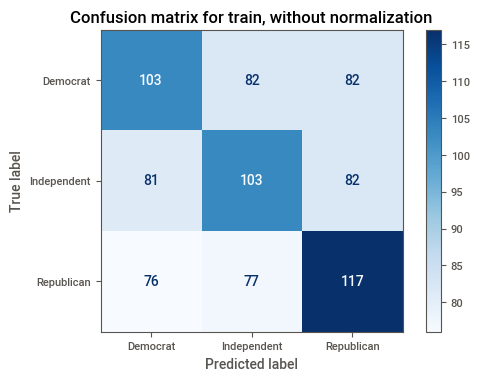

Normalized confusion matrix for train
[[0.38576779 0.3071161  0.3071161 ]
 [0.30451128 0.38721805 0.30827068]
 [0.28148148 0.28518519 0.43333333]]


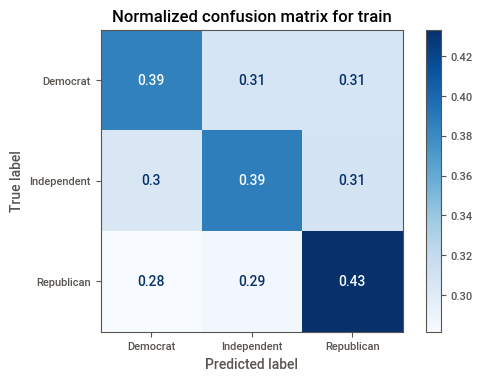

In [158]:
titles_options = [("Confusion matrix for train, without normalization", None),
                ("Normalized confusion matrix for train", 'true')]
class_names = clf['classifier'].classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_train, y_train,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Confusion matrix for model 1 for test data

Confusion matrix for test, without normalization
[[21 28 20]
 [26 23 22]
 [22 21 18]]


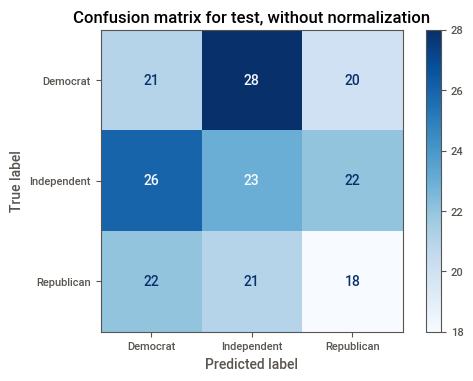

Normalized confusion matrix for test
[[0.30434783 0.4057971  0.28985507]
 [0.36619718 0.32394366 0.30985915]
 [0.36065574 0.3442623  0.29508197]]


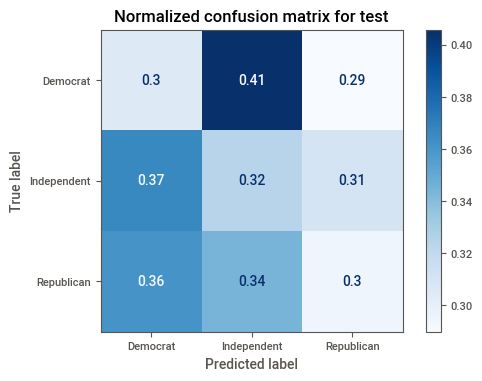

In [159]:
titles_options = [("Confusion matrix for test, without normalization", None),
                ("Normalized confusion matrix for test", 'true')]
class_names = clf.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Summary for Model1: Model 1 scores 40% in training data and 30% in test data. it shows poor scoring also indicates towards overfitting.
Also, confusion matrix shows 82+82+81+82+76+77= 480 incorrect prediction and only 103+103+117= 230 correct prediction for training data. For test data confusion matrix shows 21+23+18= 62 correct predictions and 28+20+26+22+22+21= 139 incorrect predictions.

Fit 2nd model  on training data

In [236]:
clf_model_l1 = LogisticRegression(penalty = 'l2', C = 0.001, solver = 'saga', max_iter =500)

In [237]:
clf_LR_Model2 = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', clf_model_l1)])
    

In [239]:
clf_LR_Model2.fit(X_train, y_train)
print("Training score: %.3f" % clf_LR_Model2.score(X_train, y_train))
print("Test score: %.3f" % clf_LR_Model2.score(X_test, y_test))

Training score: 0.382
Test score: 0.393


Confusion Matrix for model 2 on training data

Confusion matrix for train, without normalization
[[ 72 149  44]
 [ 57 173  42]
 [ 57 147  62]]


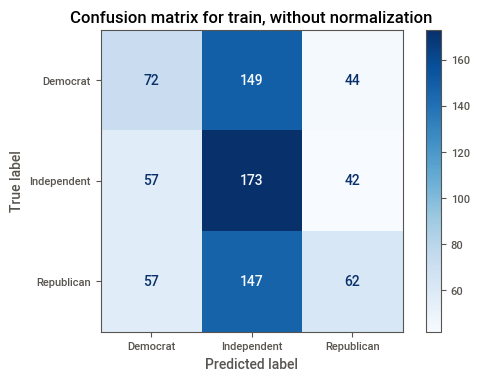

Normalized confusion matrix for train
[[0.27169811 0.56226415 0.16603774]
 [0.20955882 0.63602941 0.15441176]
 [0.21428571 0.55263158 0.23308271]]


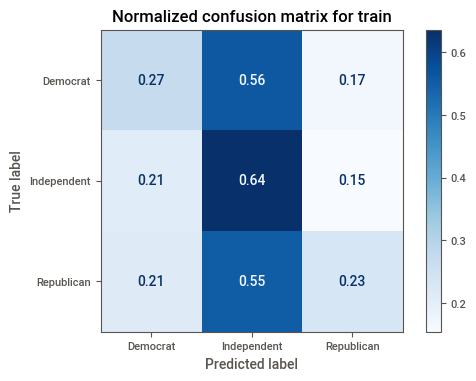

In [240]:
titles_options = [("Confusion matrix for train, without normalization", None),
                ("Normalized confusion matrix for train", 'true')]
class_names = clf_LR_Model2.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_LR_Model2, X_train, y_train,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Confusion Matrix on model 2 on test data

Confusion matrix for test, without normalization
[[21 35 15]
 [15 45  5]
 [12 40 13]]


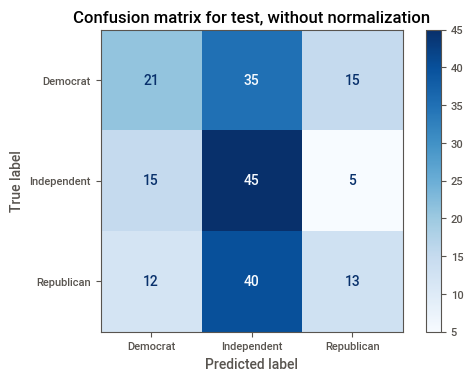

Normalized confusion matrix for test
[[0.29577465 0.49295775 0.21126761]
 [0.23076923 0.69230769 0.07692308]
 [0.18461538 0.61538462 0.2       ]]


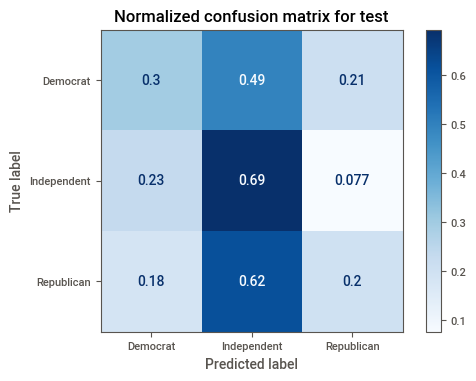

In [241]:
titles_options = [("Confusion matrix for test, without normalization", None),
                ("Normalized confusion matrix for test", 'true')]
class_names = clf_LR_Model2.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_LR_Model2, X_test, y_test,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Summary for Model2: Model 2 perform poor scoring with training score of 38% and testing score of 39%. Confusion matrix shows 72+173+62= 307 correct prediction and 149+44+57+42+57+147= 496 incorrect predictions for train data. confusion matric shows 21+45+13= 79 correct prediction and 35+15+15+5+12+40=122 incorrect prediction for test data.

Fit Final model  on training data

In [242]:
clf_model_Final = LogisticRegression(penalty = 'l2', C = 10, solver = 'saga', max_iter =500)

In [243]:
clf_LR_Final = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', clf_model_Final)])

In [244]:
clf_LR_Final.fit(X_train, y_train)
print("Training score: %.3f" % clf_LR_Final.score(X_train, y_train))
print("Test score: %.3f" % clf_LR_Final.score(X_test, y_test))

Training score: 0.394
Test score: 0.373


Confusion Matrix for final model on training data

Confusion matrix for train, without normalization
[[106  73  86]
 [ 85  93  94]
 [ 78  71 117]]


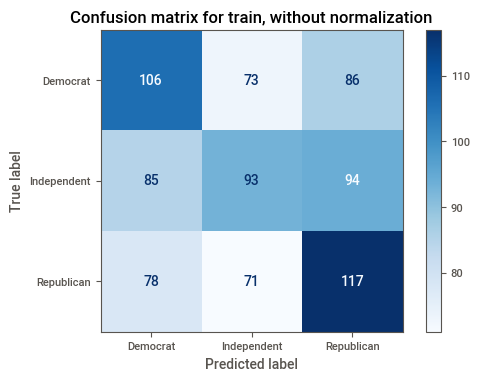

Normalized confusion matrix for train
[[0.4        0.2754717  0.3245283 ]
 [0.3125     0.34191176 0.34558824]
 [0.29323308 0.26691729 0.43984962]]


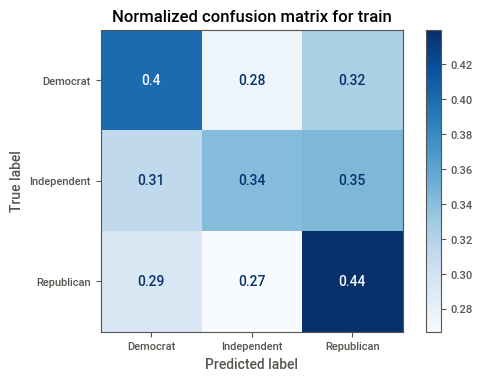

In [245]:
titles_options = [("Confusion matrix for train, without normalization", None),
                ("Normalized confusion matrix for train", 'true')]
class_names = clf_LR_Final.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_LR_Final, X_train, y_train,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Confusion Matrix for final model on test data

Confusion matrix for test, without normalization
[[28 18 25]
 [25 24 16]
 [22 20 23]]


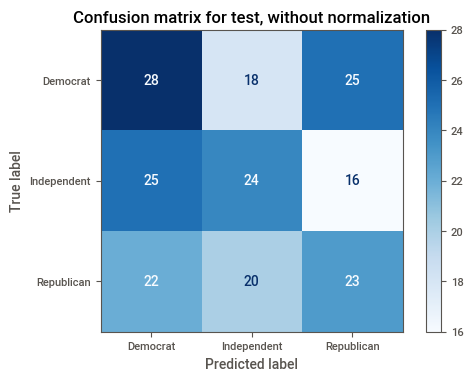

Normalized confusion matrix for test
[[0.3943662  0.25352113 0.35211268]
 [0.38461538 0.36923077 0.24615385]
 [0.33846154 0.30769231 0.35384615]]


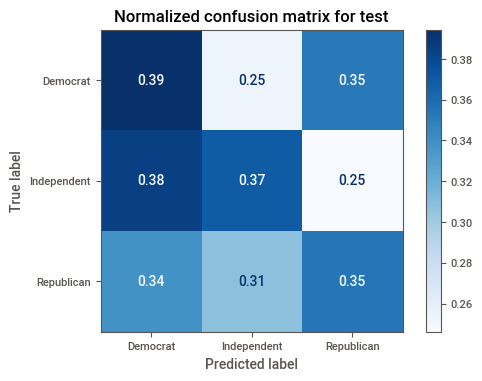

In [250]:
titles_options = [("Confusion matrix for test, without normalization", None),
                ("Normalized confusion matrix for test", 'true')]
class_names = clf_LR_Final.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_LR_Final, X_test, y_test,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

**Summary Model 3 : this model has training score 39% and testing score is 37% with C = 10.Also, confusion matrix shows that train data has 106+93+117= 316 correct prediction and 73+86+85+94+78+71 = 487 incorrect prediction without normalization. 
Test data has 28+24+23=75 correct prediction and 18+25+25+16+22+20=126 incorrect predictions.

Random Forest

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(oob_score=True, random_state =0))])

In [251]:
#clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_train, y_train)
#y_pred = clf_rf.predict(X_test)
#clf_rf.fit(X_train, y_train)
print("Training score: %.3f" % clf_rf.score(X_train, y_train))
print("Test score: %.3f" % clf_rf.score(X_test, y_test))

Training score: 1.000
Test score: 0.343


Confusion Matrix for train data for random forest

Confusion matrix for train, without normalization
[[265   0   0]
 [  0 272   0]
 [  0   0 266]]


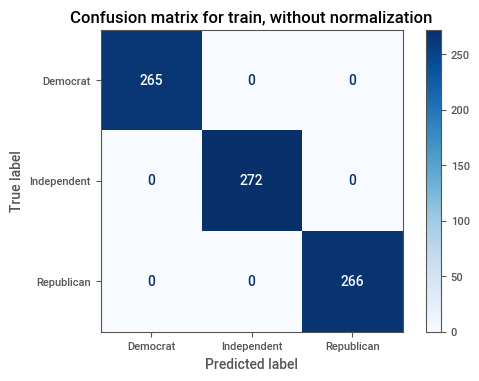

Normalized confusion matrix for train
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


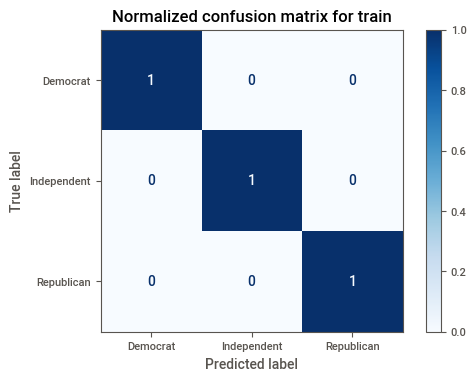

In [252]:
titles_options = [("Confusion matrix for train, without normalization", None),
                ("Normalized confusion matrix for train", 'true')]
class_names = clf_rf.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_train, y_train,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Confusion matrix for test data for random forest

Confusion matrix for test, without normalization
[[25 25 21]
 [18 27 20]
 [29 19 17]]


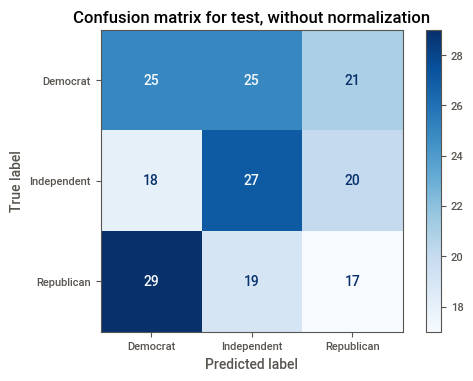

Normalized confusion matrix for test
[[0.35211268 0.35211268 0.29577465]
 [0.27692308 0.41538462 0.30769231]
 [0.44615385 0.29230769 0.26153846]]


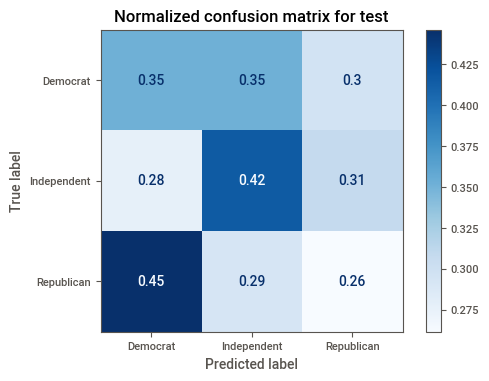

In [253]:
titles_options = [("Confusion matrix for test, without normalization", None),
                ("Normalized confusion matrix for test", 'true')]
class_names = clf_rf.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_test, y_test,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Summary for Random Forest

Random forest performs better than other Logistic models as it scores highest Training score that is 100% and Test score is 34% that indicates towards overfitting .
Also, in confusion matrix all values  803 shows correct prediction because it comes in diagonal for train data for test data 25+21+18+20+29+19 = 132 values shows incorrect predictions and 25+27+17=69 shows correct predictions. 